Here, I am using MobileNetV2 classifier to build this deep learning project

MobileNetV2: It’s a lightweight image classifier, and well optimized for mobile devices, and gives high accuracy.

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 52kB/s 


In [ ]:
!nvidia-smi

Mon Sep  7 09:13:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

 **Importing all necessary libraries**

In [ ]:
import tensorflow as tf
import os
import datetime
 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Activation,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from keras import backend as k
from keras import layers
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
 
 
import cv2
import matplotlib.pyplot as plt

In [ ]:
batch_size =32 #32,128,256
epochs = 10

In [ ]:
train_data_dir = "/content/drive/My Drive/dataset/train"
test_data_dir = "/content/drive/My Drive/dataset/test"

In [ ]:
# Preparing data
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
 
testGen = ImageDataGenerator(rescale=1./255)
 
 
train = trainGen.flow_from_directory(train_data_dir,target_size=(224,224),classes=['with_mask','without_mask'],class_mode = 'categorical',batch_size=batch_size,shuffle=True)
 
test = testGen.flow_from_directory(test_data_dir,target_size=(224,224),classes=['with_mask','without_mask'],class_mode = 'categorical',batch_size=batch_size)


Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


ImageDataGenerator helps us to create augmented data like zooming images and resize and colors of images in the training set. It is used for making better training data.

In [ ]:
mob = MobileNetV2(alpha=1.3,
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
)
mob.trainable = False
 
 
model = Sequential()
model.add(mob)
 
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
 
model.add(Dense(2,activation='softmax'))
 
model.summary()

15441920/15441408 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.30_224 (Functi (None, 7, 7, 1664)        3766048   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                106560    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 3,872,738
Trainable params: 106,690
Non-trainable params: 3,766,048
_________________________________________________________________


I already mentioned that I used MobileNetV2 and we configure it on top of Keras layers.Here I applied GlobalAveragePooling2D pooling technique and activation function ‘relu’ and dropout 0.3 and finally configure the output layer with activation softmax.

In [ ]:
model.compile(optimizer=Adam(lr=0.00002),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/10
42/42 [==============================] - 21s 497ms/step - loss: 0.0681 - accuracy: 0.9825 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 2/10
42/42 [==============================] - 20s 472ms/step - loss: 0.0629 - accuracy: 0.9817 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 3/10
42/42 [==============================] - 20s 467ms/step - loss: 0.0528 - accuracy: 0.9871 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 4/10
42/42 [==============================] - 19s 456ms/step - loss: 0.0472 - accuracy: 0.9901 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 5/10
42/42 [==============================] - 19s 461ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 6/10
42/42 [==============================] - 20s 467ms/step - loss: 0.0362 - accuracy: 0.9909 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 7/10
42/42 [==============================] - 20s 466ms/step - loss: 0.0308 - accuracy: 0.9962 - val_loss: 0.0132 - val_accuracy: 1.0000

Here I am using Adam optimizer with a learning rate of 0.00002 and I got 98.39% accuracy with these parameters.

In [ ]:
model.save('face_mask.h5')


In [ ]:
from keras.models import load_model

classifier=load_model('face_mask.h5')

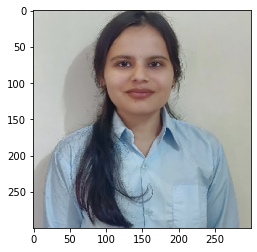

In [ ]:
import numpy as np

from keras.preprocessing import image

test_image = image.load_img('/content/3.jpg',target_size = (300, 300)) 

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow

%matplotlib inline

#plt.figure(1)

plt.imshow(test_image)

In [ ]:
import numpy as np

from keras.preprocessing import image

test_image = image.load_img('/content/3.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)

s=train.class_indices

a=result.argmax()

name=[]

for i in s:

    name.append(i)

for i in range(len(s)):

    if(i==a):

        q=name[i]

print(q)

without_mask
